Here we want to crop the whole battery reconstructed volume to focus our attention on smaller details.

In [27]:
origin_volume_path = '../data/z-volumes/r2gaus/180_avg/180_avg_r2gaus_enh.npy'
#origin_volume_path = '../data/battery/3_clear/ct_volume/volume_block_enh.npy'
#crop_volume_path = '../data/z-volumes/saxnerf/180_no_avg/mini/180_no_avg_saxnerf_cropped.npy'
crop_volume_path = '../data/battery/3_clear/ct_volume/volume_block_crop.npy'

In [36]:
import numpy as np

volume = np.load(origin_volume_path)
print(f"volume loaded with shape {volume.shape}")

volume loaded with shape (160, 160, 256)


In [37]:
volume = np.swapaxes(volume, 0, 1)
volume.shape

(160, 160, 256)

In [38]:
volume = np.swapaxes(volume, 0, 2)
volume.shape

(256, 160, 160)

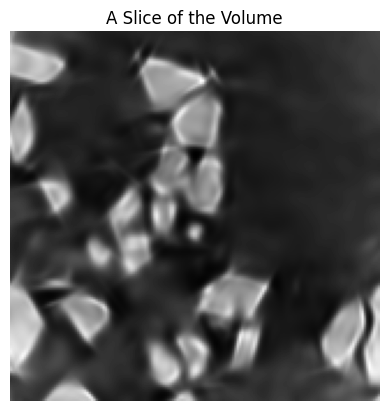

In [39]:
import matplotlib.pyplot as plt

plt.imshow(volume[30,:,:], cmap="gray")
plt.title("A Slice of the Volume")
plt.axis("off")
plt.show()

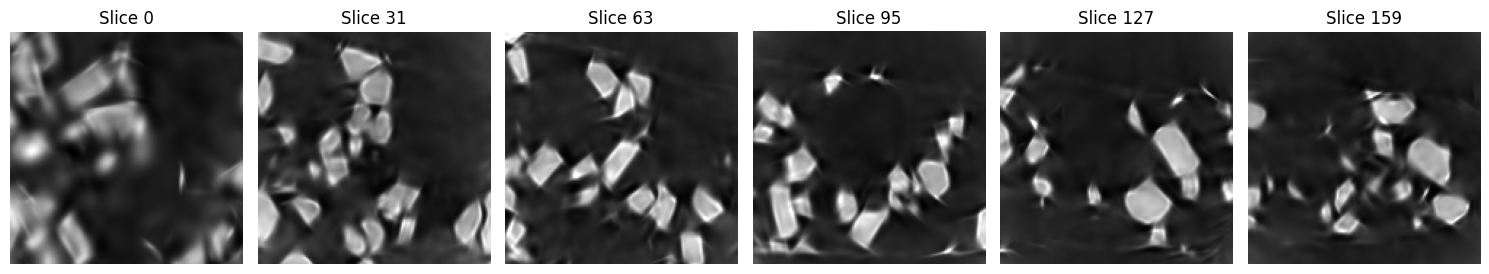

In [40]:
# Select `num_slices` equally spaced internal slices along the depth axis
num_slices = 6
slice_indices = np.linspace(0, volume.shape[2] - 1, num_slices, dtype=int)
slices = [volume[idx, :, :] for idx in slice_indices]

# Plot the slices in a row
fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
for ax, slc, idx in zip(axes, slices, slice_indices):
    ax.imshow(slc, cmap='gray')
    ax.set_title(f"Slice {idx}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [14]:
center = [dim // 2 for dim in volume.shape] # center coordinates
center

[128, 128, 128]

Cropping the cuboid inside the cilinder.

In [17]:
radius = 128
angle = np.pi/4
margin = 10

side = 2 * radius * np.cos(angle)

offset_depth = 128
offset_height = int(side / 2)
offset_width = int(side / 2)

cropped_volume = volume[
    center[0] - offset_depth: center[0] + offset_depth,
    center[1] - offset_height + margin: center[1] + offset_height - margin,
    center[2] - offset_width + margin: center[2] + offset_width - margin,
]
cropped_volume.shape

(256, 160, 160)

In [20]:
offset_height

90

In [19]:
np.save(crop_volume_path, cropped_volume)
print('Saved.')

Saved.


Cropping a small 128x128 cude inside the cilinder.

In [43]:
# define the cropping size
crop_size = 124
half_crop = crop_size // 2
print(f'cutting crops of shape {crop_size}')

cutting crops of shape 124


In [44]:
# perform the central crop
cropped_volume = volume[
    center[0] - half_crop : center[0] + half_crop,
    center[1] - half_crop : center[1] + half_crop,
    center[2] - half_crop : center[2] + half_crop,
]
cropped_volume.shape
print(f'volume cropped with shape {cropped_volume.shape}')

volume cropped with shape (124, 124, 124)


In [45]:
# Save the cropped volume
np.save(crop_volume_path, cropped_volume)
print(f"{crop_volume_path} saved")

../data/z-volumes/saxnerf/180_no_avg/mini/180_no_avg_saxnerf_cropped.npy saved
